# Advection algorithms

Illustrate solution of the advection equation $q_t + uq_x = 0$ where $u$ is constant.

Shows the upwind method and Lax-Wendroff on a square pulse.  Feel free to try other initial data!

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
from __future__ import print_function

## Desired true solution

Define the true solution as a function of $(x,t)$.  It will depend on the advection velocity `u`.  
Note how the periodic boundary conditions are imposed.

Evaluating this function at $t=0$ will give the initial conditions below.

In [31]:
def qtrue(x,t,u):
    x0 = x - u*t   # trace back characteristic to time 0
    x0 = mod(x0, 1.)  # use periodic boundary conditions to map to [0,1]
    q = where(abs(x0-0.2) < 0.1,  3., 2.)   # piecewise constant with values 2 and 3
    return q

### Computational domain and grid:

In [32]:
xlower = 0.
xupper = 1.
mx = 30
dx = float(xupper-xlower)/mx

# finite volume cell centers:
x = linspace(xlower+0.5*dx, xupper-0.5*dx, mx)

### Initial conditions on grid:

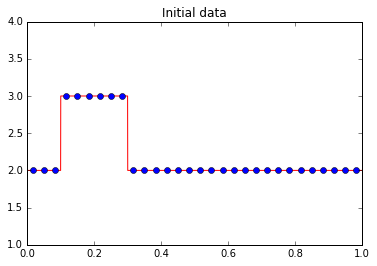

In [33]:
u = 1.
q0 = qtrue(x,0.,u)

xfine = linspace(0,1,5000)   # fine grid for plotting true solution
plot(xfine, qtrue(xfine,0.,u),'r-')
title('Initial data')

plot(x,q0,'bo')
ylim(1,4);

### Set time step and number of steps

If the Courant number `cfl` is bigger than 1, you can expect instability!

In [34]:
tfinal = 0.5
nsteps = 24
dt = float(tfinal)/nsteps
udtdx = u*dt/dx
cfl = abs(udtdx)
print("dx = %6.4f, dt = %6.4f, Courant number is cfl = %5.2f" % (dx,dt,cfl))

dx = 0.0333, dt = 0.0208, Courant number is cfl =  0.62


### Time-stepping loop

First extend the initial data to an array that includes 2 ghost cells on either side.  Only one is needed for upwind or Lax-Wendroff, but 2 would be needed if a limiter is added.

In [35]:
# extend to include 2 ghost cells on each side:
qn_ext = hstack([0., 0., q0, 0., 0.])
i1 = 2  # index of first interior cell
imx = mx+1  # index of last interior cell

for n in range(nsteps):
    
    # fill ghost cells for periodic BCs:
    qn_ext[i1-2] = qn_ext[imx-1]
    qn_ext[i1-1] = qn_ext[imx]
    qn_ext[imx+1] = qn_ext[i1]
    qn_ext[imx+2] = qn_ext[i1+1]
    
    qnp_ext = qn_ext.copy()  # make a copy, not a new pointer to old array
    
    for i in range(i1,imx+1):
        if u > 0:
            qnp_ext[i] = qn_ext[i] - udtdx * (qn_ext[i]-qn_ext[i-1])
        else:
            qnp_ext[i] = qn_ext[i] - udtdx * (qn_ext[i+1]-qn_ext[i])
    
    qn_ext = qnp_ext
    
    

### Plot the solution at the final time

Extract the interior points and plot, along with the true solution.

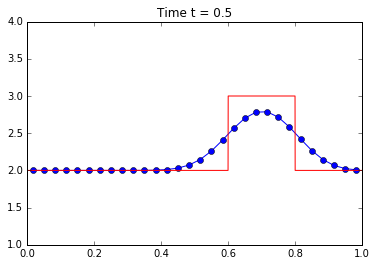

In [36]:
qn = qn_ext[i1:imx+1]
plot(x,qn,'bo-')
ylim(1,4)

plot(xfine, qtrue(xfine,tfinal,u),'r-')
title('Time t = %g' % tfinal);

### Try the following:

- Check that this code works if `u` is negative and/or if the time interval is longer, so that the periodic boundary conditions play a role.
- With `tfinal = 0.5`, try the following and make some observations about the results in each case:
  - `nsteps = 25` (why is the result so good?)
  - `nsteps = 24` (why is the result so bad?)

## Lax-Wendroff

The cell below repeats several cells from above, with only a change to the way `qnp_ext` is computed in each time step to implement the Lax-Wendroff method
$$Q_i^{n+1} = Q_i^n - \frac{u \Delta t}{2\Delta x}(Q_{i+1}^n-Q_{i-1}^n) + \frac 1 2 \left(\frac{u \Delta t}{\Delta x}\right)^2 (Q_{i+1}^n - 2Q_i^n + Q_{i-1}^n)$$

dx = 0.0333, dt = 0.0167, Courant number is cfl =  0.50


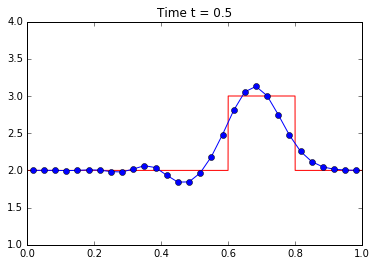

In [37]:
tfinal = 0.5
nsteps = 30
dt = float(tfinal)/nsteps
udtdx = u*dt/dx
cfl = abs(udtdx)
print("dx = %6.4f, dt = %6.4f, Courant number is cfl = %5.2f" % (dx,dt,cfl))

# extend to include 2 ghost cells on each side:
qn_ext = hstack([0., 0., q0, 0., 0.])
i1 = 2  # index of first interior cell
imx = mx+1  # index of last interior cell

# Time-stepping loop:

for n in range(nsteps):
    
    # fill ghost cells for periodic BCs:
    qn_ext[i1-2] = qn_ext[imx-1]
    qn_ext[i1-1] = qn_ext[imx]
    qn_ext[imx+1] = qn_ext[i1]
    qn_ext[imx+2] = qn_ext[i1+1]
    
    qnp_ext = qn_ext.copy()  # make a copy, not a new pointer to old array
    
    # Loop over interior points only
    for i in range(i1,imx+1):
        qnp_ext[i] = qn_ext[i] - 0.5*udtdx*(qn_ext[i+1]-qn_ext[i-1]) + \
                0.5*udtdx**2 * (qn_ext[i+1] - 2*qn_ext[i] + qn_ext[i-1])
    
    qn_ext = qnp_ext
    
qn = qn_ext[i1:imx+1]
plot(xfine, qtrue(xfine,tfinal,u),'r-')
title('Time t = %g' % tfinal)

plot(x,qn,'bo-')
ylim(1,4);

### Try the following:

- Again you might try 25 or 24 time steps.

- Go back to the beginning and increase `mx` to see how all the plots change on a finer grid (e.g. `mx = 400`).  You will also have to increase `nsteps` or the methods will be unstable!



### Next step:

The notebook [Advection_Examples2.ipynb](Advection_Examples2.ipynb) has a version of the upwind code that also creates a set of figures t